# Cross-Validation

In [57]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # create a synthetic dataset 

X, y = make_blobs(random_state = 0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test))) 

Test set score: 0.88


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Here, cross_val_score performed three-fold cross-validation and therefore returned three scores. We can change the number of folds used by changing the cv parameter:

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users

In [59]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print("Cross-validation scores: {}".format(scores)) 

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

It’s recommended to use at least five-fold cross-validation.A common way to summarize the cross-validation accuracy is to computethe mean:

In [60]:
print("Average cross-validation score: {:.2f}".format(scores.mean())) 

Average cross-validation score: 0.96


we can also conclude thatthere is a relatively high variance in the accuracy between folds,ranging from 100% accuracy to 90% accuracy. This could imply that themodel is very dependent on the particular folds used for training, butit could also just be a consequence of the small size of the dataset.

There is a second function you can use for cross-validation, calledcross_validate . It has a similar interface to cross_val_score , butreturns a dictionary containing training and test times (and optionallythe training score, in addition to the test scores) for each split:

In [61]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv = 5, return_train_score = True)
display(res)

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

{'fit_time': array([0.00241613, 0.00195503, 0.00130105, 0.00160003, 0.00117683]),
 'score_time': array([0.00058007, 0.00034904, 0.0003109 , 0.00035787, 0.00032902]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [62]:
import pandas as pd

res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores: \n ", res_df.mean()) 

,fit_time,score_time,test_score,train_score
0,0.002416,0.000580,1.000000,0.950000
1,0.001955,0.000349,0.966667,0.966667
2,0.001301,0.000311,0.933333,0.966667
3,0.001600,0.000358,0.900000,0.975000
4,0.001177,0.000329,1.000000,0.958333


Mean times and scores: 
  fit_time       0.001690
score_time     0.000385
test_score     0.960000
train_score    0.963333
dtype: float64


# Benefits of Cross-Validation

## Stratified k-Fold Cross-Validation and Other Strategies

Splitting the dataset into k folds by starting with the first one-k th part of the data, as described in the previous section, might not always be a good idea. scikit-learn does not use it for classification, but rather uses stratified k-foldcross-validation.

However, scikit-learn allowsfor much finer control over what happens during the splitting of thedata by providing a cross-validation splitter as the cv parameter.For most use cases, the defaults of k fold cross-validation forregression and stratified k fold for classification work well, but thereare some cases where you might want to use a different strategy.

This way, we can verify that it is indeed a really bad idea to usethree-fold (nonstratified) cross-validation on the iris dataset:

In [63]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5) 
print("Cross-validation scores: \n {}".format(cross_val_score(logreg, iris.data, iris.target,cv = kfold)))

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

Cross-validation scores: 
 [1.         0.93333333 0.43333333 0.96666667 0.43333333]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [64]:
kfold = KFold(n_splits = 3)
print("Cross-validation scores: \n {}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

Cross-validation scores: 
 [0. 0. 0.]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Another way to resolve thisproblem is to shuffle the data instead of stratifying the folds, toremove the ordering of the samples by label. We can do that by setting theshuffle parameter of KFold to True .

In [65]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print("Cross-validation scores: \n {}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold))) 

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

Cross-validation scores: 
 [0.9  0.96 0.96]


## Leave-one-out cross-validation

For each split, you pick a singledata point to be the test set. This can be very time consuming,particularly for large datasets, but sometimes provides better estimateson small datasets:

In [66]:
from sklearn.model_selection import LeaveOneOut 

print("iris.target.shape", iris.target.shape)

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)

print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

iris.target.shape (150,)


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

Number of cv iterations:  150
Mean accuracy: 0.95


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

## Shuffle-split cross-validation

Shuffle-split cross-validation allows for control over the number ofiterations independently of the training and test sizes, which cansometimes be helpful. It also allows for using only part of the data in each iteration, by providing train_size and test_size settings thatdon’t add up to one. Subsampling the data in this way can be useful forexperimenting with large datasets

In [67]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)

print("scores.shape", scores.shape)
print("Cross-validation scores: \n {}".format(scores))

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

scores.shape (10,)
Cross-validation scores: 
 [0.98666667 0.97333333 0.98666667 0.93333333 0.96       0.97333333
 0.96       0.96       0.94666667 0.94666667]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

## Cross-validation with groups

it is likely that pictures of the sameperson will be in both the training and the test set. It will be mucheasier for a classifier to detect emotions in a face that is part of thetraining set, compared to a completely new face. To accurately evaluatethe generalization to new faces, we must therefore ensure that thetraining and test sets contain images of different people.

In [68]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples = 12, random_state = 0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [ 0 , 0 , 0 , 1 , 1 , 1 , 1 , 2 , 2 , 3 , 3 , 3 ]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits = 3)) 
print("Cross-validation scores: \n {}".format(scores))

Cross-validation scores: 
 [0.75       0.8        0.66666667]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3

## Simple Grid Search

Lookingat all possible combinations creates a table (or grid) of parametersettings for the SVM.
Given this result, we might be tempted to report that we found a modelthat performs with 97% accuracy on our dataset. However, this claim couldbe overly optimistic (or just wrong), for the following reason:

In [69]:
# naive grid search implementation

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001 , 0.01 , 0.1 , 1 , 10 , 100]:
        # for each combination of parameters, train an SVC 
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


Because we used the test data to adjust the parameters, wecan no longer use it to assess how good the model is. This is the samereason we needed to split the data into training and test sets in thefirst place; we need an independent dataset to evaluate, one that wasnot used to create the model. One way to resolve this problem is to split the data again, so we havethree sets: the training set to build the model, the validation (ordevelopment) set to select the parameters of the model, and the testset to evaluate the performance of the selected parameters. Figure 5-5 shows what this looks like:

However, the scoreon the test set the score that actually tells us how well wegeneralize is even lower, at 92%.So we can only claim to classify newdata 92% correctly, not 97% correctly as we thought before!

In [70]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print("Size of training set: {} size of validation set: {} size of test set:" " {} \n ".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C , 'gamma' : gamma}
            
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score)) 

Size of training set: 84 size of validation set: 28 size of test set: 38 
 
Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

For a better estimateof the generalization performance, instead of using a single split intoa training and a validation set, we can use cross-validation to evaluatethe performance of each parameter combination.

In [71]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma = gamma, C = C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C , 'gamma' : gamma}
            # rebuild a model on the combined training and validation set
            svm = SVC(** best_parameters)
            svm.fit(X_trainval, y_trainval)

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


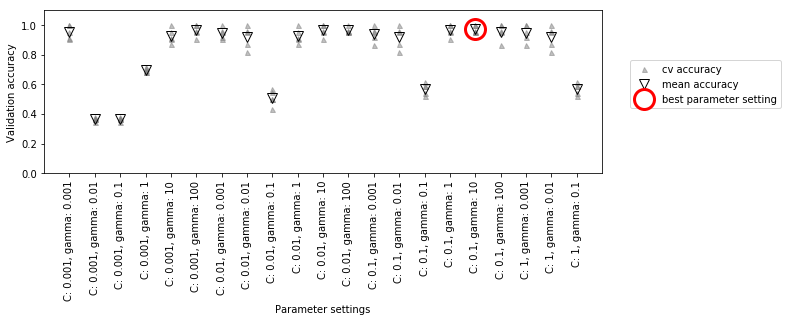

In [72]:
import mglearn
mglearn.plots.plot_cross_val_selection()

We can now instantiate the GridSearchCV class with the model ( SVC ),the parameter grid to search ( param_grid ), and the cross-validationstrategy we want to use (say, five-fold stratified cross-validation):

In [73]:
param_grid = { 'C' : [ 0.001 , 0.01 , 0.1 , 1 , 10 , 100 ], 'gamma' : [ 0.001 , 0.01 , 0.1 , 1 , 10 , 100 ]}
print("Parameter grid: \n {}".format(param_grid))

Parameter grid: 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


The grid_search object that we created behaves just like a classifier;we can call the standard methods fit , predict , and score on it. 1 However,when we call fit , it will run cross-validation for each combination ofparameters we specified in param_grid.

Choosing the parameters using cross-validation, we actually found amodel that achieves 97% accuracy on the test set. The important thinghere is that we did not use the test set to choose the parameters. Theparameters that were found are stored in the best_params_ attribute,and the best cross-validation accuracy (the mean accuracy over thedifferent splits for this parameter setting) is stored in best_score_

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True) 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0) 
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Again, be careful not to confuse best_score_ with the generalization performance of the model as computed by the score method on the test set. Using the score method (or evaluating the output of the predict method) employs a model trained on the whole training set . The best_score_ attribute stores the mean cross-validation accuracy, with cross-validation performed on the training set.

In [75]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


## Analyzing the result of cross-validation
It is often helpful to visualize the results of cross-validation, tounderstand how the model generalization depends on the parameters we aresearching. As grid searches are quite computationally expensive to run,often it is a good idea to start with a relatively coarse and smallgrid. We can then inspect the results of the cross-validatedgrid search, and possibly expand our search. The results of a gridsearch can be found in the cv_results_ attribute, which is a dictionarystoring all aspects of the search. It contains a lot of details, as you can see in the following output, andis best looked at after converting it to a pandas DataFrame :

In [76]:
import pandas as pd
from statistics import mean

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print("columns", results.columns)

# show the first 5 rows
display(results.head())

mean_test_score = mean([
    results.loc[0]['split0_test_score'],
    results.loc[0]['split1_test_score'],
    results.loc[0]['split2_test_score'],
    results.loc[0]['split3_test_score'],
    results.loc[0]['split4_test_score'],
])

print(mean_test_score)
print(results.loc[0]['mean_test_score'])

mean_train_score = mean([
    results.loc[0]['split0_train_score'],
    results.loc[0]['split1_train_score'],
    results.loc[0]['split2_train_score'],
    results.loc[0]['split3_train_score'],
    results.loc[0]['split4_train_score'],
])

print(mean_train_score)
print(results.loc[0]['mean_train_score'])

# mean_test_score の値が一番高いパラメータをgrid_searchで検索する
print("best_params", grid_search.best_params_)
bestID = results['mean_test_score'].argmax()
print(results.loc[bestID])

columns Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001173,0.000309,0.000690,0.000398,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.001164,0.000254,0.000536,0.000210,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.001770,0.000770,0.000659,0.000182,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.001207,0.000479,0.000460,0.000128,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.001348,0.000513,0.000584,0.000324,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


0.366210239036326
0.36607142857142855
0.36607871529219843
0.36607871529219843
best_params {'C': 100, 'gamma': 0.01}
mean_fit_time                       0.000394535
std_fit_time                        2.33297e-05
mean_score_time                     0.000271177
std_score_time                      2.76473e-05
param_C                                     100
param_gamma                                0.01
params                {'C': 100, 'gamma': 0.01}
split0_test_score                             1
split1_test_score                      0.956522
split2_test_score                             1
split3_test_score                      0.954545
split4_test_score                      0.952381
mean_test_score                        0.973214
std_test_score                        0.0223995
rank_test_score                               1
split0_train_score                     0.988636
split1_train_score                     0.977528
split2_train_score                     0.977778
split3_train_score  

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Each row in results corresponds to one particular parametersetting. For each setting, the results of all cross-validation splitsare recorded, as well as the mean and standard deviation over all splits. Aswe were searching a two-dimensional grid of parameters ( C andgamma ), this is best visualized as a heat map ( Figure 5-8 ). First we extract themean validation scores, then we reshape the scores so that the axescorrespond to C and gamma

results.shape (36, 22)
results.mean_test_score.shape (36,)


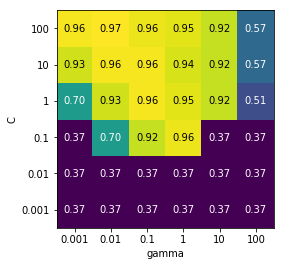

In [77]:
print("results.shape", results.shape)
print("results.mean_test_score.shape", results.mean_test_score.shape)

scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'], ylabel = 'C', yticklabels = param_grid['C'], cmap = "viridis") 

Now let’s look at some plots (shown inFigure 5-9 ) where the result is lessideal, because the search ranges were not chosen properly:

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


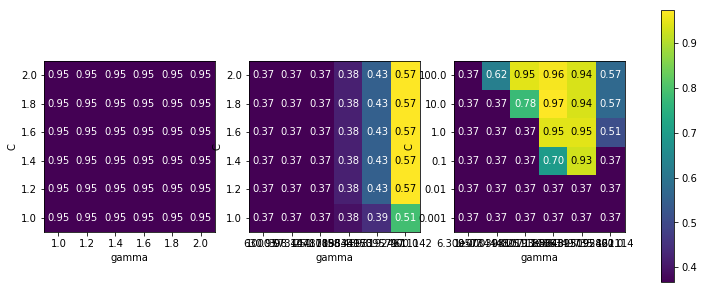

In [78]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize = (13, 5))

param_grid_linear = { 'C' : np.linspace(1, 2, 6), 'gamma' : np.linspace(1, 2, 6)}
param_grid_one_log = { 'C' : np.linspace(1, 2, 6), 'gamma' : np.logspace(3, 2, 6)}
param_grid_range = { 'C' : np.logspace(-3, 2, 6), 'gamma' : np.logspace(-7, 2, 6)}

for param_grid, ax in zip([ param_grid_linear, param_grid_one_log, param_grid_range ], axes ):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = "viridis", ax = ax)

plt.colorbar(scores_image, ax = axes.tolist())

In some cases, trying all possible combinations of all parametersas GridSearchCV usually does, is not a good idea.

In this case, searching over all possible combinations ofC , gamma , and kernel wouldn’t make sense: if kernel='linear' ,gamma is not used, and trying different values for gamma would be awaste of time. To deal with these kinds of “conditional” parameters,GridSearchCV allows the param_grid to be a list of dictionaries .Each dictionary in the list is expanded into an independent grid

In [79]:
param_grid = [
    {
        'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel' : ['linear'],
        'C' : [0.001, 0.01, 0.1, 1, 10 , 100]
    }
]
print("List of grids: \n {}".format(param_grid))

List of grids: 
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [80]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Let’s look at the cv_results_ again. As expected, if kernel is'linear' , then only C is varied:

In [81]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T) 

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00125403,0.00103402,0.000968122,0.000797844,0.00113964,0.000828886,0.000662756,0.000658751,0.000655413,0.000645638,...,0.000396729,0.000575447,0.000923014,0.00094471,0.000549221,0.000504017,0.000433874,0.000415421,0.000418711,0.000426579
std_fit_time,0.000371095,0.000179624,0.000245426,6.20568e-05,0.00028228,0.000186685,4.67649e-05,2.34277e-05,1.43043e-05,7.35938e-06,...,1.76681e-05,2.64275e-05,4.14614e-05,3.46837e-05,6.58588e-06,6.1325e-06,4.08914e-06,1.18728e-05,1.66562e-05,3.32138e-05
mean_score_time,0.000788593,0.000669336,0.000528431,0.000371361,0.000507641,0.000333977,0.00031395,0.000294399,0.000292349,0.000291061,...,0.000280285,0.000300646,0.000293159,0.000300789,0.000268459,0.000268126,0.000255728,0.000250626,0.000250053,0.000248432
std_score_time,0.000217009,0.000254248,0.000155969,4.00522e-05,0.000191549,5.00116e-05,4.21386e-05,5.81937e-06,1.89779e-06,2.4098e-06,...,4.90022e-05,2.64926e-05,9.41026e-06,6.95692e-06,2.0894e-06,6.04023e-06,8.06405e-07,1.35207e-06,1.97988e-06,8.39558e-07
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


## Nested cross-validation

But when using GridSearchCV as described earlier, we still have a single split of thedata into training and test sets, which might make ourresults unstable and make us depend too much on this single splitof the data.

The result of this procedure is a list of scores not a model, and not aparameter setting. The scores tell us how well a model generalizes,given the best parameters found by grid search. As it doesn’t provide amodel that can be used on new data, nested cross-validation is rarelyused when looking for a predictive model to apply to future data.However, it can be useful for evaluating how well a given model works ona particular dataset.

In [82]:
param_grid = { 'C' : [ 0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001


It can be a bittricky to understand what is happening in the single line given above,and it can be helpful to visualize it as for loops, as done in thefollowing simplified implementation:

In [83]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test parts)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_params = {}
        best_score = np.inf
        
        # iterate over parameters
        for parameters in parameter_grid :
            # accumulate score over inner splits
            cv_scores = [] # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score : 
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
            # build classifier on best parameters using outer training set
            
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [84]:
from sklearn.model_selection import ParameterGrid , StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Imbalanced datasets

In reality, imbalanced data is the norm, and it israre that the events of interest have equal or even similar frequency inthe data.

However,accuracy doesn’t allow us to distinguish the constant “no click” modelfrom a potentially good model.

In [85]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
print("digits.data.shape", digits.data.shape)
print("y.shape", y.shape)
print("y[:3]", y[:3])
X_train, X_test, y_train, y_test = train_test_split(digits.data, y ,random_state = 0)

digits.data.shape (1797, 64)
y.shape (1797,)
y[:3] [False False False]


We can use the DummyClassifier to always predict the majority class(here “not nine” ) to see how uninformative accuracy can be.
We obtained close to 90% accuracy without learning anything. 

In [86]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


they did a very good job. But depending on the problem,that might be possible by just predicting one class! Let’s compare thisagainst using an actual classifier:

In [87]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


The dummy classifier that produces random output is clearly the worst ofthe lot (according to accuracy), while LogisticRegression producesvery good results. However, even the random classifier yields over 80%accuracy.

The problem here is that accuracy is an inadequatemeasure for quantifying predictive performance in this imbalancedsetting.

In [88]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Unique predicted labels: {}".format(np.bincount(pred_dummy)))
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Unique predicted labels: [408  42]
dummy score: 0.84
logreg score: 0.98


## Confusion matrices

One of the most comprehensive ways to represent the result of evaluatingbinary classification is using confusion matrices.

In [89]:
from sklearn.metrics import confusion_matrix

print("y_test.shape", y_test.shape)
print("pred_logreg.shape", pred_logreg.shape)
print("y_test[:3]", y_test[:3])
print("pred_logreg[:3]", pred_logreg[:3])

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix: \n {}".format(confusion))

y_test.shape (450,)
pred_logreg.shape (450,)
y_test[:3] [False False False]
pred_logreg[:3] [False False False]
Confusion matrix: 
 [[401   2]
 [  8  39]]


In [90]:
# 単純な配列で挙動テスト

y = np.array([False,False,True]).reshape(3,)
pred = np.array([False, True, False]).reshape(3,)

print("y.shape", y.shape)
print("pred.shape", pred.shape)

confusion = confusion_matrix(y, pred)
print("Confusion matrix: \n {}".format(confusion))

print("true negative(正しくnegativeと予測できている))", confusion[0,0])
print("false positive(誤ってpositiveと予測している))", confusion[0,1])
print("false negative（誤ってnegativeを予測している）", confusion[1,0])
print("true positive(正しくpositiveを予測している)", confusion[1,1])

y.shape (3,)
pred.shape (3,)
Confusion matrix: 
 [[1 1]
 [1 0]]
true negative(正しくnegativeと予測できている)) 1
false positive(誤ってpositiveと予測している)) 1
false negative（誤ってnegativeを予測している） 1
true positive(正しくpositiveを予測している) 0


Now let’s use the confusion matrix to compare the models we fittedearlier (the two dummy models, the decision tree, and the logisticregression):

Looking at the confusion matrix, it is quite clear that something iswrong with pred_most_frequent , because it always predicts the sameclass. pred_dummy , on the other hand, has a very small number of truepositives (4), particularly compared to the number of false negativesand false positives there are many more false positives than truepositives!

In [91]:
print("Most frequent class:")
print(confusion_matrix(y_test , pred_most_frequent ))
print(" \n Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\n Decision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\n Logistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]
 
 Dummy model:
[[363  40]
 [ 45   2]]

 Decision tree:
[[390  13]
 [ 24  23]]

 Logistic Regression
[[401   2]
 [  8  39]]


## Precision, recall, and f-score

Precision measures howmany of the samples predicted as positive are actually positive.

So, while precision and recall are very important measures, looking atonly one of them will not provide you with the full picture. One way tosummarize them is the f-score or f-measure , which is with the harmonicmean of precision and recall:
This particular variant is also known as the f 1 score. Asit takes precision and recall into account, it can be a better measurethan accuracy on imbalanced binary classification datasets.

In [92]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format ( f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.04
f1 score tree: 0.55
f1 score logistic regression: 0.89


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


A disadvantageof the f score , however, is that it is harder to interpret and explainthan accuracy. If we want a more comprehensive summary of precision, recall, and f 1 score, we can use the classification_report convenience function tocompute all three at once, and print them in a nice format:

In [93]:
from sklearn.metrics import classification_report

print("pred_most_frequent", np.bincount(pred_most_frequent))
print(classification_report(y_test, pred_most_frequent, target_names = ["not nine" , "nine"]))

pred_most_frequent [450]
              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
print(classification_report(y_test, pred_dummy, target_names = ["not nine", "nine"])) 

              precision    recall  f1-score   support

    not nine       0.89      0.90      0.90       403
        nine       0.05      0.04      0.04        47

   micro avg       0.81      0.81      0.81       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.80      0.81      0.81       450



In [95]:
print(classification_report(y_test, pred_logreg, target_names = ["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [96]:
# 単純な数値でテスト

print("confusion_matrix")

# True Negative, False Positive
print("True Negative, False Positive")
y = np.array([False,False]).reshape(2,)
pred = np.array([False, True]).reshape(2,)
print(confusion_matrix (y, pred)) 
print(classification_report(y, pred, target_names = ["False", "True"]))

# False Negative, True Positive
print("False Negative, True Positive")
y = np.array([True,True]).reshape(2,)
pred = np.array([False, True]).reshape(2,)
print(confusion_matrix (y, pred)) 
print(classification_report(y, pred, target_names = ["False", "True"]))

print("all")
y = np.array([False,False,True, True]).reshape(4,)
pred = np.array([False, True, True, False]).reshape(4,)
print(confusion_matrix (y, pred)) 
print(classification_report(y, pred, target_names = ["False", "True"]))

confusion_matrix
True Negative, False Positive
[[1 1]
 [0 0]]
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

False Negative, True Positive
[[0 0]
 [1 1]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.50      0.67         2

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

all
[[1 1]
 [1 1]]
              precision    recall  f1-score   support

       False       0.50      0.50      0.50         2
        True       0.50      0.50      0.50         2

   micro avg       0.50      0.50      0.50         4
  

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [97]:
# 単純な数値でテスト
# PositiveとPredictされたサンプルのうち正しくPredictされた割合
# Precision = TP / (TP + FP)

# 実際にPositive classのうち正しくPositiveと判定された割合
# Recall = TP / (TP + FN)

# Trueのrecallが1.0となる。Trueが誤ってFalseと判定されてることはない
# Falseのracallは0。すべてのFalseが誤ってTrueと判定されている
print("false neagtive を避けるためにすべてtrueと予測する")
y = np.array([False,False, True]).reshape(3,)
pred = np.array([True, True, True]).reshape(3,)
print(confusion_matrix (y, pred)) 
print(classification_report(y, pred, target_names = ["False", "True"]))

# Falseのrecallが1.0となる。Falseが誤ってTrueと判定されてることはない
# Trueのracallは0。すべてのTrueが誤ってFalseと判定されている
y = np.array([False,False, True]).reshape(3,)
pred = np.array([False, False, False]).reshape(3,)
print(confusion_matrix (y, pred)) 
print(classification_report(y, pred, target_names = ["False", "True"]))

false neagtive を避けるためにすべてtrueと予測する
[[0 2]
 [0 1]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.33      1.00      0.50         1

   micro avg       0.33      0.33      0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

[[2 0]
 [1 0]]
              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

   micro avg       0.67      0.67      0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



## Taking uncertainty into account

In [98]:
X , y = make_blobs(n_samples = (400, 50), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

For class 1, we get a fairly small precision, and recall is mixed.Because class 0 is so much larger, the classifier focuses on gettingclass 0 right, and not the smaller class 1. Let’s assume in our application it is more important to have a highrecall for class 1, as in the cancer screening example earlier. Thismeans we are willing to risk more false positives (false class 1) inexchange for more true positives (which will increase the recall).

In [99]:
predict = svc.predict(X_test)
print("predict", predict)
print(classification_report(y_test, predict))

predict [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Bydefault, points with a decision_function value greater than 0 will beclassified as class 1. We want more points to be classified as class1, so we need to decrease the threshold.

As expected, the recall of class 1 went up, and the precision went down.

In [100]:
y_pred_lower_threshold = svc.decision_function(X_test) > .8

print(y_pred_lower_threshold)
print(classification_report(y_test, y_pred_lower_threshold))

[False False False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False False False  True False False
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       104
           1       0.50      0.44      0.47         9

   micro avg       0.92      0.92      0.92       113
   macro avg       0.73      0.70      0.71       113
weighted avg       0.92      0.92      

## Precision-recall curves and ROC
curves As we just discussed, changing the threshold that is used to make aclassification decision in a model is a way to adjust the trade-off ofprecision and recall for a given classifier. Maybe you want to miss lessthan 10% of positive samples, meaning a desired recall of 90%. Thisdecision depends on the application, and it should be driven by businessgoals.

In [101]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

The curve starts at the top-left corner,corresponding to a very low threshold, classifying everything as thepositive class. Raising the threshold moves the curve toward higherprecision, but also lower recall. Raising the threshold more and more,we get to a situation where most of the points classified as beingpositive are true positives, leading to a very high precision but lowerrecall. The more the model keeps recall high as precision goes up, thebetter.

In other words, on the left the curve is relatively flat,meaning that recall does not go down a lot when we require increasedprecision. For precision greater than 0.5, each gain in precision costsus a lot of recall.

svc.decision_function(X_test) [-1.12256809  0.86782231 -0.14655591 ... -1.16165424 -1.11836907
 -1.11553629]


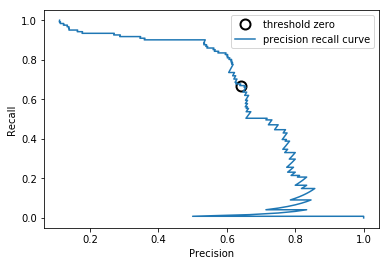

In [102]:
X, y = make_blobs(n_samples = (4000, 500), cluster_std = [7.0, 2],  random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

svc = SVC(gamma = .05).fit(X_train, y_train)

print("svc.decision_function(X_test)", svc.decision_function(X_test))
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)
plt.plot(precision, recall, label = "precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

Let’s compare the SVM we trainedto a random forest trained on the same dataset.

rf.predict_proba(X_test) [[1.   0.  ]
 [0.65 0.35]
 [0.3  0.7 ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


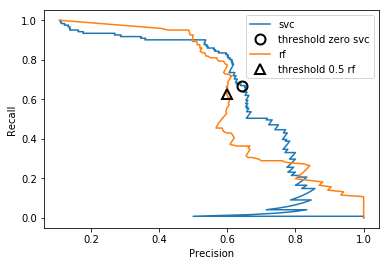

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
# its secondargument a certainty measure for the positive class (class 1), so wepass the probability of a sample being class 1
print("rf.predict_proba(X_test)", rf.predict_proba(X_test))
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label = "svc")
plt.plot(precision[close_zero ], recall[close_zero ], 'o' , markersize = 10, label = "threshold zero svc", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision_rf, recall_rf, label = "rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c = 'k', markersize = 10, label = "threshold 0.5 rf", fillstyle = "none", mew = 2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

If we only looked at the f 1 score to compare overallperformance, we would have missed these subtleties. The f 1 score onlycaptures one point on the precision-recall curve, the one given by thedefault threshold:

In [104]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


Comparing two precision-recall curves provides a lot of detailed insight, but is a fairly manual process. For automatic model comparison,we might want to summarize the information contained in the curve,without limiting ourselves to a particular threshold or operating point.

In [105]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


## Receiver operating characteristics (ROC) and AUC

Similar to theprecision-recall curve, the ROC curve considers all possible thresholds for a given classifier, but instead of reporting precision and recall,it shows the false positive rate (FPR) against the true positive rate (TPR). Recall that the true positive rate is simply another name forrecall, while the false positive rate is the fraction of false positivesout of all negative

For the ROC curve, the ideal curve is close to the top left: you want a classifier that produces a high recall while keeping a low falsepositive rate .

###  Precision
Trueとpredictした場合の正解率
TPR(Recall) = TP / (TP + FP)   
※ TP + FP = Predict Positive Class

### TRP(Recall)
Positive Class Sampleのうち正しくPositiveと正しく予測できた割合
TPR(Recall) = TP / (TP + FN)   
※ TP + FN = Positive Class Samples

### FRP
Negative Class SamplesのうちPositiveと誤って予測した割合
FPR = FP / (FP + TN)  
※ FP + TN = Negative Class Samples

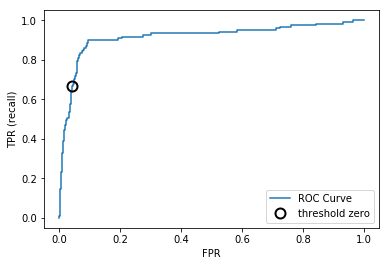

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

You can find a comparison of the random forest and the SVM using ROCcurves

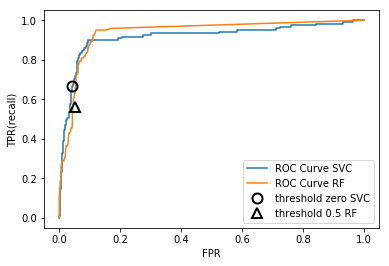

In [107]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label = "ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label = "ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR(recall)")

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "threshold zero SVC", fillstyle = "none", c = 'k', mew = 2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize = 10, label = "threshold 0.5 RF", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

As for the precision-recall curve, we often want to summarize the ROCcurve using a single number, the area under the curve (this is commonly just referred to as the AUC, and it is understood that the curve in question is the ROC curve). We cancompute the area under the ROC curve using the roc_auc_score function:

Predictingrandomly always produces an AUC of 0.5, no matter how imbalanced theclasses in a dataset are. This makes AUC a much better metric forimbalanced classification problems than accuracy. The AUC can beinterpreted as evaluating the ranking of positive samples. It’sequivalent to the probability that a randomly picked point of thepositive class will have a higher score according to the classifier thana randomly picked point from the negative class. So, a perfect AUC of 1means that all positive points have a higher score than all negativepoints. For classification problems with imbalanced classes, using AUC for model selection is often much more meaningful than using accuracy.

In [108]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


The accuracy of all three settings of gamma is the same, 90%. This might be the same as chance performance, or it might not. Looking at the AUC andthe corresponding curve, however, we see a clear distinction between thethree models. With gamma=1.0 , the AUC is actually at chance level,meaning that the output of the decision_function is as good as random.With gamma=0.05 , performance drastically improves to an AUC of 0.9.Finally, with gamma=0.01 , we get a perfect AUC of 1.0. That means thatall positive points are ranked higher than all negative points accordingto the decision function. In other words, with the right threshold, thismodel can classify the data perfectly! 5 Knowing this,we can adjust the threshold on this model and obtain great predictions.If we had only used accuracy, we would never have discovered this. For this reason, we highly recommend using AUC when evaluating models onimbalanced data. Keep in mind that AUC does not make use of the defaultthreshold, though, so adjusting the decision threshold might be necessary toobtain useful classification results from a model with a high AUC.

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


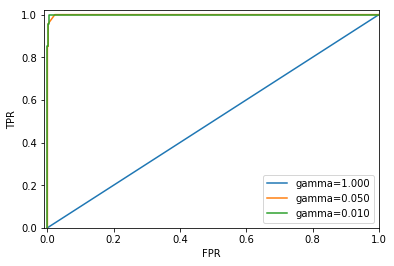

In [117]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma = gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    
    plt.plot(fpr, tpr, label = "gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")    
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc = "best")

## Metrics for Multiclass Classification

Imagine athree-class classification problem with 85% of points belonging to classA, 10% belonging to class B, and 5% belonging to class C
What does being85% accurate mean on this dataset?

Let’s apply these two detailed evaluation methods on the task ofclassifying the 10 different handwritten digits in the digits dataset:

In [118]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict ( X_test )
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix: \n {}".format(confusion_matrix(y_test, pred)))

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.953
Confusion matrix: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


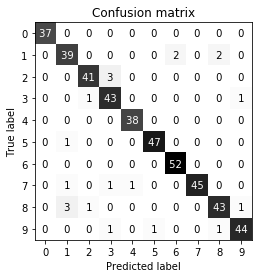

In [119]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel = 'Predicted label', ylabel = 'True label', xticklabels = digits.target_names, yticklabels = digits.target_names, cmap = plt.cm.gray_r, fmt = " %d ")
plt.title("Confusion matrix")
plt.gca().invert_yaxis() 


With the classification_report function, we can compute the precision,recall, and f score for each class:

Unsurprisingly, precision and recall are a perfect 1 for class 0, asthere are no confusions with this class. For class 7, on the otherhand, precision is 1 because no other class was mistakenly classified as7, while for class 6, there are no false negatives, so the recallis 1.

In [120]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



If you care about each sample equally much, it is recommended to use the"micro" average f 1 score; if you care about each class equally much,it is recommended to use the "macro" average f 1 score:

In [121]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average = "micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average = "macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


## Using Evaluation Metrics in Model Selection

Say, for example, wewant to evaluate the SVM classifier on the “nine vs. rest” task on thedigits dataset, using the average precision score. Changing the scorefrom the default (accuracy) to average precision can be done byproviding "average_precision" as the scoring parameter:

In [122]:
# default scoring for classification is accuracy

print ( "Default scoring:", cross_val_score(SVC(), digits.data, digits.target == 9, cv = 5))
# providing scoring="accuracy" doesn't change the results

explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "accuracy", cv = 5)
print("Explicit accuracy:", explicit_accuracy)
ap = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "average_precision", cv = 5)
print("Average precision:", ap)

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/

Default scoring: [0.9        0.9        0.89972145 0.89972145 0.89972145]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/

Explicit accuracy: [0.9        0.9        0.89972145 0.89972145 0.89972145]


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/

Average precision: [0.97968342 0.97740563 0.9781204  0.99040404 0.95507256]


Using cross_validate , we can even compute several metrics at once:

In [123]:
res = cross_validate(SVC(), digits.data, digits.target == 9, scoring = ["accuracy", "average_precision", "recall_macro"], return_train_score = True, cv = 5)
display(pd.DataFrame(res))

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/YoheiMiyamoto/anaconda3/

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.343637,0.184481,0.900000,1.0,0.979683,1.0,0.5,1.0
1,0.291248,0.180061,0.900000,1.0,0.977406,1.0,0.5,1.0
2,0.241165,0.134849,0.899721,1.0,0.978120,1.0,0.5,1.0
3,0.235664,0.135767,0.899721,1.0,0.990404,1.0,0.5,1.0
4,0.252543,0.196656,0.899721,1.0,0.955073,1.0,0.5,1.0


Similarly, we can change the metric used to pick the best parameters inGridSearchCV :

When using accuracy, the parameter gamma=0.0001 is selected, whilegamma=0.01 is selected when using average precision

In [125]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state = 0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma' : [ 0.0001 , 0.01 , 0.1 , 1 , 10 ]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid = param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set average precision: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(
    # identical to grid.score here
    accuracy_score(y_test, grid.predict(X_test )))) 


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set average precision: 0.966
Test set accuracy: 0.973


In [127]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring = "average_precision") 
grid.fit(X_train, y_train)
print("Grid-Search with average precision")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (average precision): {:.3f}".format(grid.best_score_))
print("Test set average precision: {:.3f}".format(
    # identical to grid.score here
    average_precision_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(accuracy_score(y_test, grid.predict(X_test)))) 

/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid-Search with average precision
Best parameters: {'gamma': 0.01}
Best cross-validation score (average precision): 0.985
Test set average precision: 0.996
Test set accuracy: 0.896
